# Analysis of German Used Car Sales from eBay Classifieds
The aim of this project is to clean the data and analyze the included used car listings.

The data dictionary provided with data is as follows:

1. dateCrawled - When this ad was first crawled. All field-values are taken from this date.
2. name - Name of the car.
3. seller - Whether the seller is private or a dealer.
4. offerType - The type of listing
5. price - The price on the ad to sell the car.
6. abtest - Whether the listing is included in an A/B test.
7. vehicleType - The vehicle Type.
8. yearOfRegistration - The year in which the car was first registered.
9. gearbox - The transmission type.
10. powerPS - The power of the car in PS (horse power).
11. model - The car model name.
12. kilometer - How many kilometers the car has driven.
13. monthOfRegistration - The month in which the car was first registered.
14. fuelType - What type of fuel the car uses.
15. brand - The brand of the car.
16. notRepairedDamage - If the car has a damage which is not yet repaired.
17. dateCreated - The date on which the eBay listing was created.
18. nrOfPictures - The number of pictures in the ad.
19. postalCode - The postal code for the location of the vehicle.
20. lastSeenOnline - When the crawler saw this ad last online.

### Load Workspace

In [103]:
import re
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats
import statsmodels.formula.api as smf

### Load the Data

In [2]:
df = pd.read_csv('autos.csv', encoding='latin')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [105]:
deep_colors = [
    '#4C72B0', '#55A868', '#C44E52',
    '#8172B2', '#CCB974', '#64B5CD'
]

### Data Cleaning

**Rename Columns**

In [4]:
new_columns = {
    'dateCrawled':'date_crawled',  
    'offerType':'offer_type', 
    'price':'price_usd',
    'vehicleType':'vehicle_type', 
    'yearOfRegistration':'registration_year', 
    'powerPS':'power_ps', 
    'odometer':'odometer_km',
    'monthOfRegistration':'registration_month', 
    'fuelType':'fuel_type', 
    'notRepairedDamage':'unrepaired_damage', 
    'dateCreated':'date_created', 
    'nrOfPictures':'num_of_pictures', 
    'postalCode':'postal_code', 
    'lastSeen':'last_seen'
}

df = df.rename(columns=new_columns)
df.head()

,date_crawled,name,seller,offer_type,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
df.dtypes

date_crawled          object
name                  object
seller                object
offer_type            object
price_usd             object
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km           object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
date_created          object
num_of_pictures        int64
postal_code            int64
last_seen             object
dtype: object

**Clean Values**

In [6]:
df.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price_usd', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'num_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [7]:
df.vehicle_type.unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [8]:
df.assign(
    date_crawled=lambda x: pd.to_datetime(x.date_crawled),
    date_created=lambda x: pd.to_datetime(x.date_created),
    last_seen=lambda x: pd.to_datetime(x.last_seen),
    postal_code=lambda x: x.postal_code.astype(str),
    seller=lambda x: x.seller.map({'privat':'private', 'gewerblich':'commercial'}).fillna(x.seller),
    name=lambda x: x.name.str.replace('_', ' '),
    brand=lambda x: x.brand.str.replace('_', ' ').map({'sonstige autos':'other cars'}).fillna(x.brand),
    offer_type=lambda x: x.offer_type.map({'Angebot':'offer', 'Gesuch':'request'}).fillna(x.offer_type),
    price_usd=lambda x: x.price_usd.str.replace('$', '', regex=False).str.replace(',','', regex=False).astype(float),
    odometer_km=lambda x: x.odometer_km.str.replace('km', '', regex=False).str.replace(',','', regex=False).astype(float),
    gearbox=lambda x: x.gearbox.map({'manuell':'manual', 'automatik':'automatic'}).fillna(x.gearbox),
    vehicle_type=lambda x: x.vehicle_type.map({'kleinwagen':'small car', 'kombi':'station wagon', 'cabrio':'convertible', 'andere':'others'}).fillna(x.vehicle_type),
    fuel_type=lambda x: x.fuel_type.map({'benzin':'petrol', 'elektro':'electric', 'andere':'others'}).fillna(x.fuel_type),
    unrepaired_damage=lambda x: x.unrepaired_damage.map({'nein':'no', 'ja':'yes'}).fillna(x.unrepaired_damage),
    model=lambda x: x.model.map({'andere':'others'}).fillna(x.model),
).head()

,date_crawled,name,seller,offer_type,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot 807 160 NAVTECH ON BOARD,private,offer,5000.0,control,bus,2004,manual,158,others,150000.0,3,lpg,peugeot,no,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,private,offer,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen Golf 1.6 United,private,offer,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart smart fortwo coupe softouch/F1/Klima/Pan...,private,offer,4350.0,control,small car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford Focus 1 6 Benzin TÜV neu ist sehr gepfleg...,private,offer,1350.0,test,station wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,2016-04-01,0,39218,2016-04-01 14:38:50


In [9]:
df = df.assign(
    date_crawled=lambda x: pd.to_datetime(x.date_crawled),
    date_created=lambda x: pd.to_datetime(x.date_created),
    last_seen=lambda x: pd.to_datetime(x.last_seen),
    postal_code=lambda x: x.postal_code.astype(str),
    seller=lambda x: x.seller.map({'privat':'private', 'gewerblich':'commercial'}).fillna(x.seller),
    name=lambda x: x.name.str.replace('_', ' '),
    brand=lambda x: x.brand.str.replace('_', ' ').map({'sonstige autos':'other cars'}).fillna(x.brand),
    offer_type=lambda x: x.offer_type.map({'Angebot':'offer', 'Gesuch':'request'}).fillna(x.offer_type),
    price_usd=lambda x: x.price_usd.str.replace('$', '', regex=False).str.replace(',','', regex=False).astype(float),
    odometer_km=lambda x: x.odometer_km.str.replace('km', '', regex=False).str.replace(',','', regex=False).astype(float),
    gearbox=lambda x: x.gearbox.map({'manuell':'manual', 'automatik':'automatic'}).fillna(x.gearbox),
    vehicle_type=lambda x: x.vehicle_type.map({'kleinwagen':'small car', 'kombi':'station wagon', 'cabrio':'convertible', 'andere':'others'}).fillna(x.vehicle_type),
    fuel_type=lambda x: x.fuel_type.map({'benzin':'petrol', 'elektro':'electric', 'andere':'others'}).fillna(x.fuel_type),
    unrepaired_damage=lambda x: x.unrepaired_damage.map({'nein':'no', 'ja':'yes'}).fillna(x.unrepaired_damage),
    model=lambda x: x.model.map({'andere':'others'}).fillna(x.model),
)

df.head()

,date_crawled,name,seller,offer_type,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot 807 160 NAVTECH ON BOARD,private,offer,5000.0,control,bus,2004,manual,158,others,150000.0,3,lpg,peugeot,no,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,private,offer,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen Golf 1.6 United,private,offer,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart smart fortwo coupe softouch/F1/Klima/Pan...,private,offer,4350.0,control,small car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford Focus 1 6 Benzin TÜV neu ist sehr gepfleg...,private,offer,1350.0,test,station wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,2016-04-01,0,39218,2016-04-01 14:38:50


In [10]:
df.dtypes

date_crawled          datetime64[ns]
name                          object
seller                        object
offer_type                    object
price_usd                    float64
abtest                        object
vehicle_type                  object
registration_year              int64
gearbox                       object
power_ps                       int64
model                         object
odometer_km                  float64
registration_month             int64
fuel_type                     object
brand                         object
unrepaired_damage             object
date_created          datetime64[ns]
num_of_pictures                int64
postal_code                   object
last_seen             datetime64[ns]
dtype: object

**Handling Missing Values**

Let's drop the following features for lack of unique values:
* num_of_pictures
* seller
* offer_type

In [11]:
print(df.num_of_pictures.value_counts(dropna=False))
print('\n')
print(df.seller.value_counts(dropna=False))
print('\n')
print(df.offer_type.value_counts(dropna=False))

num_of_pictures
0    50000
Name: count, dtype: int64


seller
private       49999
commercial        1
Name: count, dtype: int64


offer_type
offer      49999
request        1
Name: count, dtype: int64


In [12]:
df = df.drop(columns=['num_of_pictures', 'seller', 'offer_type'])
df.columns

Index(['date_crawled', 'name', 'price_usd', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')

We'll replace the missing values for the following features with the mode:
* vehicle_type
* gearbox
* fuel_type
* unrepaired_damage

In [13]:
df.loc[df.vehicle_type.isna(), ['name', 'vehicle_type', 'price_usd', 'gearbox']].head()

,name,vehicle_type,price_usd,gearbox
8,Seat Arosa,NaN,250.0,manual
10,VW Golf Tuning in siber/grau,NaN,999.0,manual
11,Mercedes A140 Motorschaden,NaN,350.0,NaN
27,Hat einer Ahnung mit Ford Galaxy HILFE,NaN,0.0,NaN
46,BMW mit Lpg,NaN,9000.0,automatic


Modes:

In [14]:
print('Mode of Vehicle Type: ', df.vehicle_type.mode().iloc[0])
print('Mode of Gearbox: ', df.gearbox.mode().iloc[0])
print('Mode of Fuel Type: ', df.fuel_type.mode().iloc[0])
print('Mode of Unrepaired Damage: ', df.unrepaired_damage.mode().iloc[0])

Mode of Vehicle Type:  limousine
Mode of Gearbox:  manual
Mode of Fuel Type:  petrol
Mode of Unrepaired Damage:  no


In [15]:
df.loc[df.vehicle_type.isna(), 'vehicle_type'] = df.vehicle_type.mode().iloc[0]
df.loc[df.gearbox.isna(), 'gearbox'] = df.gearbox.mode().iloc[0]
df.loc[df.fuel_type.isna(), 'fuel_type'] = df.fuel_type.mode().iloc[0]
df.loc[df.unrepaired_damage.isna(), 'unrepaired_damage'] = df.unrepaired_damage.mode().iloc[0]

Check for missing values:

In [16]:
df.isnull().sum()

date_crawled             0
name                     0
price_usd                0
abtest                   0
vehicle_type             0
registration_year        0
gearbox                  0
power_ps                 0
model                 2758
odometer_km              0
registration_month       0
fuel_type                0
brand                    0
unrepaired_damage        0
date_created             0
postal_code              0
last_seen                0
dtype: int64

Separate date and time from `date_crawled`:

In [17]:
df[['date_crawled', 'time_crawled']] = df['date_crawled'].astype(str).str.split(pat=' ', n=1, expand=True)

df['date_crawled'] = pd.to_datetime(df['date_crawled'])
df['time_crawled'] = pd.to_datetime(df['time_crawled'], format='%H:%M:%S').dt.time

In [18]:
col_order = [
    'date_crawled', 'time_crawled', 'name', 'price_usd', 'abtest', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km', 'registration_month', 'fuel_type', 'brand', 'unrepaired_damage', 'date_created', 'postal_code', 'last_seen',
]
df = df[col_order]

df.head()

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
0,2016-03-26,17:47:46,Peugeot 807 160 NAVTECH ON BOARD,5000.0,control,bus,2004,manual,158,others,150000.0,3,lpg,peugeot,no,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04,13:38:56,BMW 740i 4 4 Liter HAMANN UMBAU Mega Optik,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,petrol,bmw,no,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26,18:57:24,Volkswagen Golf 1.6 United,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,petrol,volkswagen,no,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12,16:58:10,Smart smart fortwo coupe softouch/F1/Klima/Pan...,4350.0,control,small car,2007,automatic,71,fortwo,70000.0,6,petrol,smart,no,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01,14:38:50,Ford Focus 1 6 Benzin TÜV neu ist sehr gepfleg...,1350.0,test,station wagon,2003,manual,0,focus,150000.0,7,petrol,ford,no,2016-04-01,39218,2016-04-01 14:38:50


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        50000 non-null  datetime64[ns]
 1   time_crawled        50000 non-null  object        
 2   name                50000 non-null  object        
 3   price_usd           50000 non-null  float64       
 4   abtest              50000 non-null  object        
 5   vehicle_type        50000 non-null  object        
 6   registration_year   50000 non-null  int64         
 7   gearbox             50000 non-null  object        
 8   power_ps            50000 non-null  int64         
 9   model               47242 non-null  object        
 10  odometer_km         50000 non-null  float64       
 11  registration_month  50000 non-null  int64         
 12  fuel_type           50000 non-null  object        
 13  brand               50000 non-null  object    

**Dealing with Incorrect Registration Year Data**

Replace registration year with crawled year where the registration year is higher than the crawled year. This is because, we don't expect cars to be registered after they are posted:

In [20]:
reg_index = df.assign(
    year_crawled=lambda x: x.date_crawled.dt.year,
    reg_greater_crawl=lambda x: np.where(
        x.year_crawled < x.registration_year,
        'no', 'yes'
    ),
).query('reg_greater_crawl=="no" & registration_year > year_crawled').index

df.loc[reg_index, 'registration_year'] = df.loc[reg_index, 'date_crawled'].dt.year

In [21]:
df.assign(
    year_crawled=lambda x: x.date_crawled.dt.year,
    reg_greater_crawl=lambda x: np.where(
        x.year_crawled < x.registration_year,
        'no', 'yes'
    ),
).query('reg_greater_crawl=="no" & registration_year > year_crawled')

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,year_crawled,reg_greater_crawl


Replace all registration years less than 1950 with 1950:

In [22]:
df.loc[df.registration_year < 1950]

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
2221,2016-03-15,14:57:07,Sehr seltener Oldtimer Opel 1210 zum Restaurieren,3350.0,control,others,1934,manual,0,others,5000.0,0,petrol,opel,yes,2016-03-15,49828,2016-04-06 06:17:51
2573,2016-03-19,22:51:25,Hanomag rekord 15k Suche ersatz teile,3000.0,test,others,1934,manual,0,NaN,90000.0,1,petrol,other cars,no,2016-03-19,90489,2016-03-19 22:51:25
3679,2016-04-04,00:36:17,Suche Auto,1.0,test,limousine,1910,manual,0,NaN,5000.0,0,petrol,other cars,no,2016-04-04,40239,2016-04-04 07:49:15
10556,2016-04-01,06:02:10,UNFAL Auto,450.0,control,limousine,1800,manual,1800,NaN,5000.0,2,petrol,mitsubishi,no,2016-04-01,63322,2016-04-01 09:42:30
11047,2016-03-08,20:50:10,Andere Simca 5 Fourgonette Kombilimousine,17500.0,control,station wagon,1948,manual,0,NaN,60000.0,6,petrol,other cars,no,2016-03-08,47546,2016-04-05 21:15:42
11246,2016-03-26,19:49:59,Ford Model A Roadster Deluxe 1931,27500.0,control,convertible,1931,manual,39,others,10000.0,7,petrol,ford,no,2016-03-26,9322,2016-04-06 09:46:59
11585,2016-03-11,21:48:36,Volkswagen VW Typ 82,41900.0,test,convertible,1943,manual,0,others,100000.0,7,petrol,volkswagen,yes,2016-03-11,84174,2016-03-21 13:18:05
13963,2016-03-20,17:51:49,Mercedes Benz L1500S Wehrmacht / Luftwaffe F...,26900.0,test,others,1941,manual,60,others,60000.0,7,petrol,mercedes_benz,no,2016-03-20,38723,2016-04-07 01:17:51
15898,2016-03-08,10:50:05,Tausch alles aus meinen Anzeigen gegen Auto,0.0,test,limousine,1910,manual,0,NaN,5000.0,0,petrol,other cars,no,2016-03-08,6108,2016-03-08 17:47:19
21416,2016-03-12,08:36:21,Essex super six Ford A,16500.0,control,convertible,1927,manual,40,others,5000.0,5,petrol,ford,no,2016-03-12,74821,2016-03-15 12:45:12


In [23]:
df.loc[df.registration_year < 1950, 'registration_year'] = 1950

In [24]:
df.loc[df.registration_year < 1950]

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen


### Exploratory & Statistical Analysis

In [25]:
df.describe(include='object')

,time_crawled,name,abtest,vehicle_type,gearbox,model,fuel_type,brand,unrepaired_damage,postal_code
count,50000,50000,50000,50000,50000,47242,50000,50000,50000,50000
unique,20687,38754,2,8,2,245,7,40,2,7014
top,20:36:19,Ford Fiesta,test,limousine,manual,golf,petrol,volkswagen,no,10115
freq,14,78,25756,17954,39673,4024,34589,10687,45061,109


In [26]:
df.describe()

,date_crawled,price_usd,registration_year,power_ps,odometer_km,registration_month,date_created,last_seen
count,50000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000
mean,2016-03-20 22:01:17.184000,9.840044e+03,2003.327200,116.355920,125732.700000,5.723360,2016-03-20 19:41:34.656000,2016-03-30 04:04:36.309079808
min,2016-03-05 00:00:00,0.000000e+00,1950.000000,0.000000,5000.000000,0.000000,2015-06-11 00:00:00,2016-03-05 14:45:46
25%,2016-03-13 00:00:00,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,2016-03-13 00:00:00,2016-03-23 11:11:33.500000
50%,2016-03-21 00:00:00,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,2016-04-04 01:17:24
75%,2016-03-29 00:00:00,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,2016-04-06 10:45:28.249999872
max,2016-04-07 00:00:00,1.000000e+08,2016.000000,17700.000000,150000.000000,12.000000,2016-04-07 00:00:00,2016-04-07 14:58:50
std,NaN,4.811044e+05,7.531531,209.216627,40042.211706,3.711984,NaN,NaN


Distribution of numeric features:
* Price
* Registration year
* Horse power
* Odometer

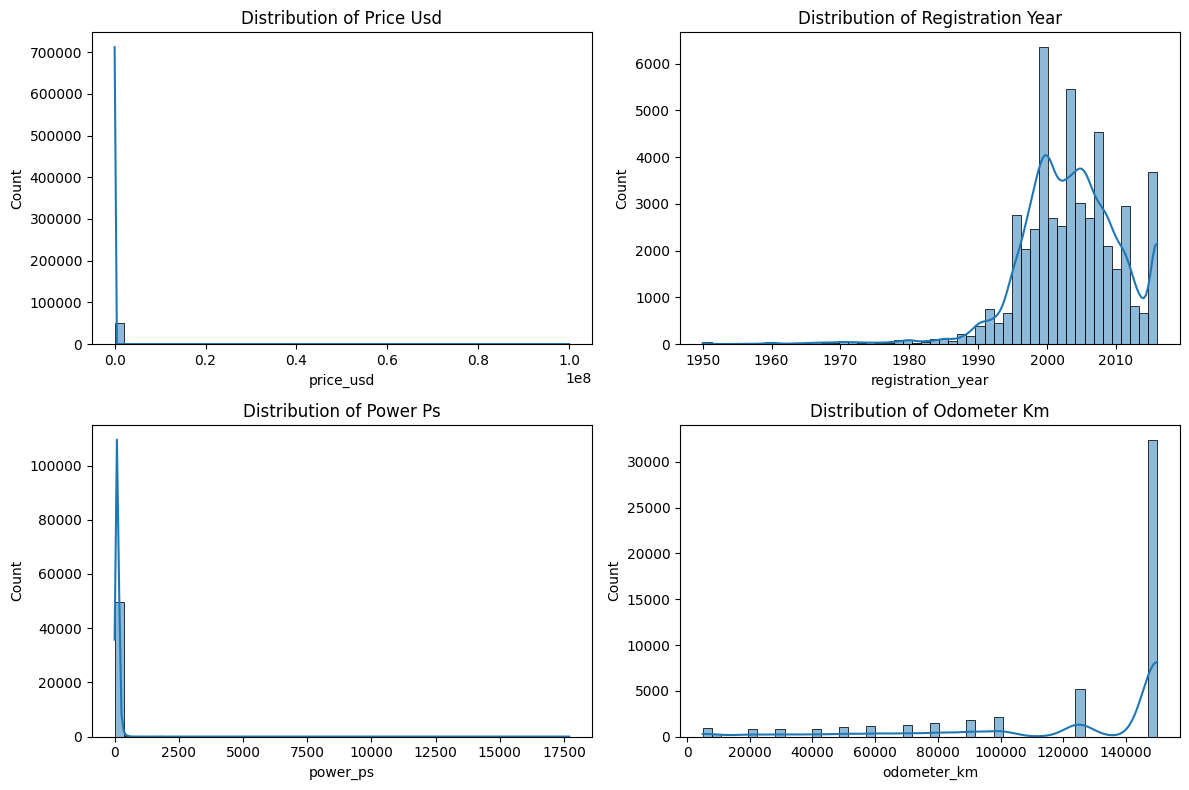

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
columns_to_plot = [
    'price_usd', 'registration_year', 'power_ps', 'odometer_km'
]

for ax, col in zip(axes.ravel(), columns_to_plot):
    sns.histplot(data=df, x=col, ax=ax, bins=50, kde=True)
    ax.set_xlabel(col)
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}')

plt.tight_layout()
# plt.suptitle('Distribution of Numeric Variables')
plt.show()

**Spread of Categorical Variables**

* abtest
* vehicle type
* gearbox
* fuel type
* unrepaired damage

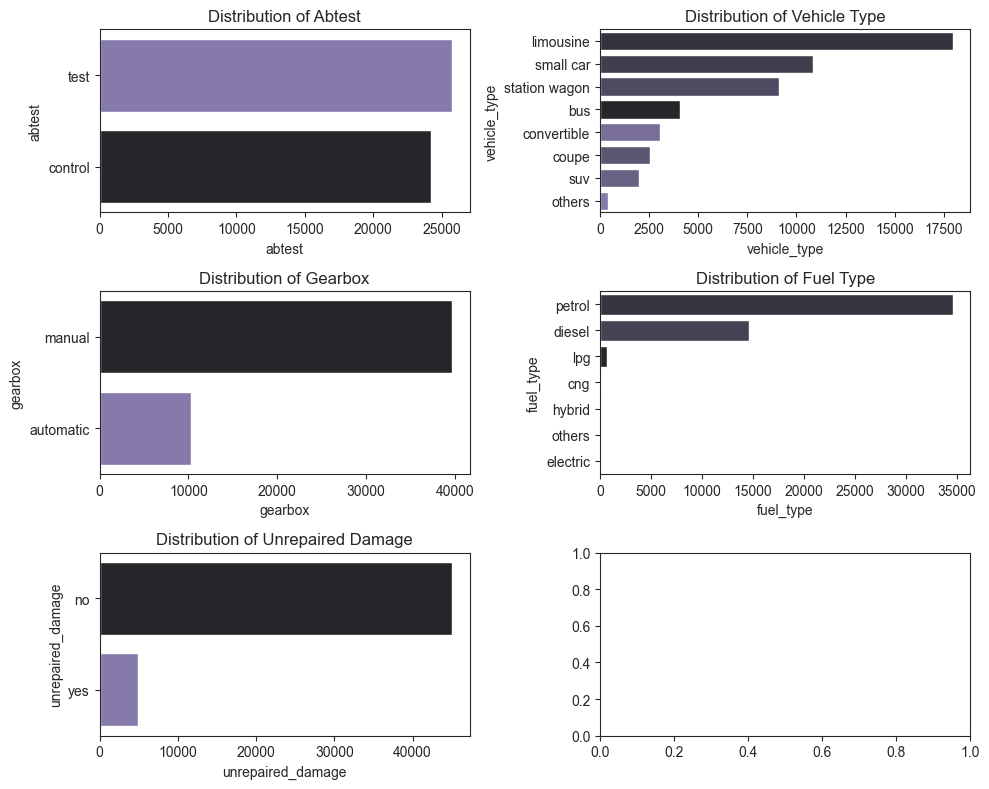

In [144]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
columns_to_plot = [
    'abtest', 'vehicle_type', 'gearbox', 'fuel_type', 'unrepaired_damage'
]

for ax, col in zip(axes.ravel(), columns_to_plot):
    count_data = df.groupby(col).size().sort_values(ascending=False).reset_index()
    num_bars = len(count_data)

    sns.countplot(
        data=df, y=col, hue=col, ax=ax, 
        palette=f'dark:{deep_colors[3]}', 
        orient='h', legend=False,
        order=count_data[col]
        )
    ax.set_xlabel(col)
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

**Price of Cars Over Time**

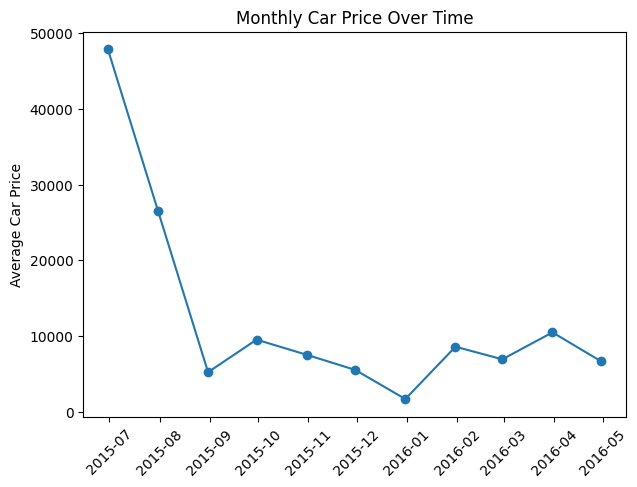

In [29]:
monthly_mean = df.set_index('date_created').price_usd.resample('M').mean().interpolate()

plt.figure(figsize=(7, 5))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xticks(rotation=45)
# plt.xlabel('Year')
plt.ylabel('Average Car Price')
plt.title('Monthly Car Price Over Time')
plt.show()

The average price for the earlier months may reflect fewer listings in that period, many of which were high value. Let's confirm:

In [30]:
df.query('date_created < "2015-09-01"')

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
20649,2016-03-08,17:57:45,Cabrio Peugeot 206 CC Platinium zum Winterpreis!,5200.0,control,convertible,2006,manual,109,2_reihe,80000.0,11,petrol,peugeot,no,2015-08-10,26382,2016-04-05 20:46:54
22781,2016-03-23,01:48:59,Mercedes Benz C220 BT 7G Tronic AMG Modellja...,47900.0,test,limousine,2014,automatic,0,c_klasse,20000.0,2,diesel,mercedes_benz,no,2015-06-11,46145,2016-04-06 09:47:02


Let's plot to exclude these values:

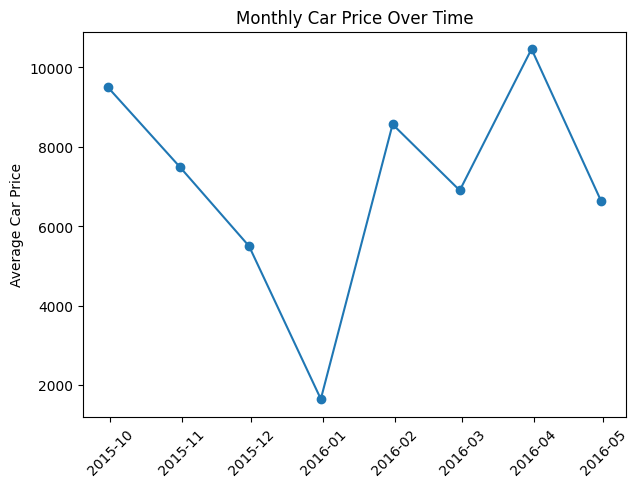

In [31]:
monthly_mean = df.query('date_created >= "2015-09-01"').set_index('date_created').price_usd.resample('M').mean().interpolate()

plt.figure(figsize=(7, 5))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('Average Car Price')
plt.title('Monthly Car Price Over Time')
plt.show()

**Seasonality in Car Listings**

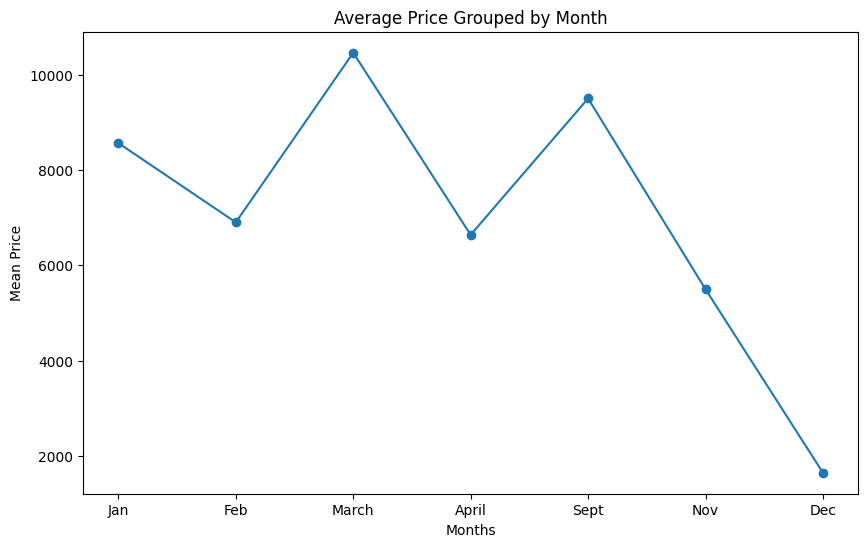

In [32]:
monthly_mean = df.query('date_created >= "2015-09-01"').price_usd.groupby(df.query('date_created >= "2015-09-01"').date_created.dt.month).mean()

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_mean.index = monthly_mean.index.map(month_mapping)

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Months')
plt.ylabel('Mean Price')
plt.title('Average Price Grouped by Month')
plt.show()

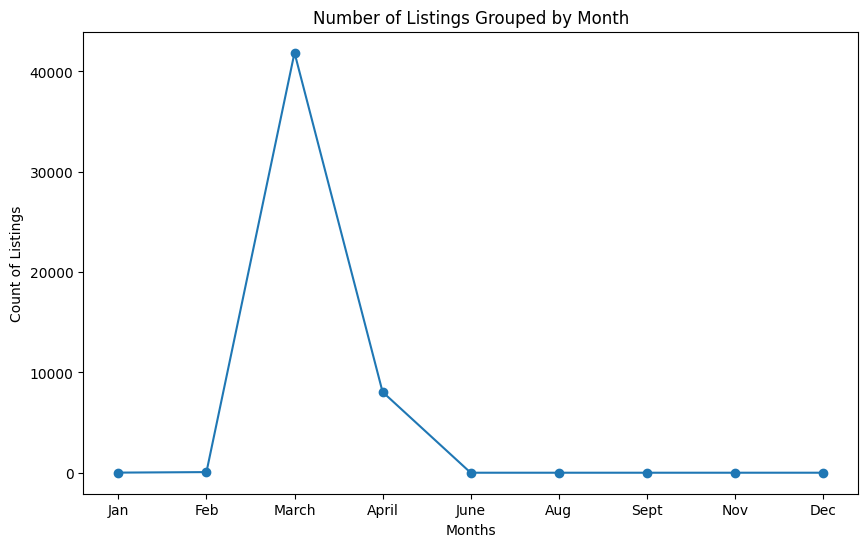

In [33]:
monthly_mean = df.price_usd.groupby(df.date_created.dt.month).count()

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_mean.index = monthly_mean.index.map(month_mapping)

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Months')
plt.ylabel('Count of Listings')
plt.title('Number of Listings Grouped by Month')
plt.show()

**How Long Do Listings stay onsite?**

We'll use this analysis to determine how old listings are on the website. We'll arrive at this value by subtracting `date_created` from `last_seen`

In [34]:
df.loc[:, ['date_crawled', 'date_created', 'last_seen']].head()

,date_crawled,date_created,last_seen
0,2016-03-26,2016-03-26,2016-04-06 06:45:54
1,2016-04-04,2016-04-04,2016-04-06 14:45:08
2,2016-03-26,2016-03-26,2016-04-06 20:15:37
3,2016-03-12,2016-03-12,2016-03-15 03:16:28
4,2016-04-01,2016-04-01,2016-04-01 14:38:50


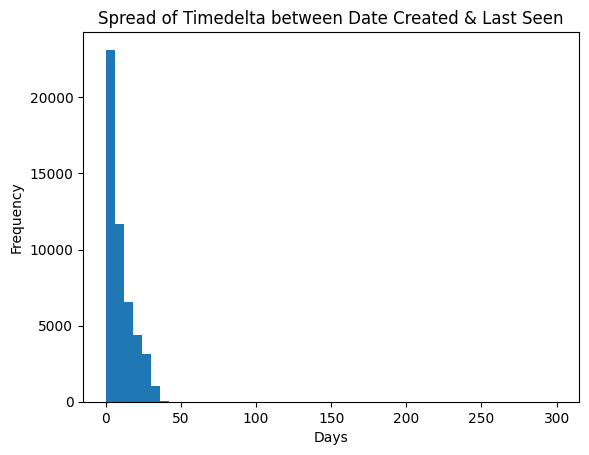

In [35]:
df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).listing_duration.plot(
    kind='hist', bins=50, title='Spread of Timedelta between Date Created & Last Seen'
)
plt.xlabel('Days')
plt.show()

Most listings remain on the site for under 50 days. However, our histogram has a long right tail. Let's see how many values are represented in the tail:

In [36]:
df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50')

,date_crawled,time_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,listing_duration
2232,2016-03-05,19:53:54,Orginaler Golf V R32 aus 2.Hand,14499.0,test,limousine,2006,manual,250,NaN,90000.0,12,petrol,volkswagen,no,2016-01-03,47495,2016-04-07 14:56:36,95.0
2243,2016-03-23,23:37:01,Gepflegter Peugoet 207 Sport VTi Sport,5499.0,control,limousine,2009,manual,95,2_reihe,70000.0,3,petrol,peugeot,no,2015-11-10,22941,2016-04-07 09:15:21,149.0
4696,2016-04-03,23:56:59,E46 318ti Compact silber Automatik ca. 170000k...,3500.0,control,limousine,2016,automatic,143,3er,150000.0,12,petrol,bmw,no,2016-01-27,57439,2016-04-06 16:36:38,70.0
9467,2016-03-15,01:57:24,Rohkarosse Porsche 911 unfallfrei rostfei 9...,19911.0,test,coupe,1986,manual,0,911,150000.0,1,petrol,porsche,no,2016-02-14,95197,2016-04-07 10:44:23,53.0
10735,2016-03-20,22:50:24,VW Golf V 5 TDI Xenon Tempomat 140 PS Coming H...,5500.0,test,limousine,2016,manual,140,golf,150000.0,10,diesel,volkswagen,no,2016-01-29,14943,2016-03-28 11:15:54,59.0
11432,2016-03-25,05:50:41,Volkswagen Touran 1 4 TSI Neuer Motor 3/15 mit...,12700.0,test,bus,2010,manual,140,touran,90000.0,8,petrol,volkswagen,no,2016-02-05,31311,2016-04-04 10:45:45,59.0
15081,2016-03-05,20:59:31,Audi A6 Allroad 2.5 TDI,5800.0,control,limousine,2005,automatic,180,a6,150000.0,3,diesel,audi,no,2016-02-02,14772,2016-04-05 19:16:53,63.0
19857,2016-03-07,09:58:38,Audi a6 240PS TÜV 10.2017,0.0,control,limousine,2006,manual,240,a6,150000.0,0,diesel,audi,no,2016-02-09,78532,2016-04-05 17:22:23,56.0
20649,2016-03-08,17:57:45,Cabrio Peugeot 206 CC Platinium zum Winterpreis!,5200.0,control,convertible,2006,manual,109,2_reihe,80000.0,11,petrol,peugeot,no,2015-08-10,26382,2016-04-05 20:46:54,239.0
22781,2016-03-23,01:48:59,Mercedes Benz C220 BT 7G Tronic AMG Modellja...,47900.0,test,limousine,2014,automatic,0,c_klasse,20000.0,2,diesel,mercedes_benz,no,2015-06-11,46145,2016-04-06 09:47:02,300.0


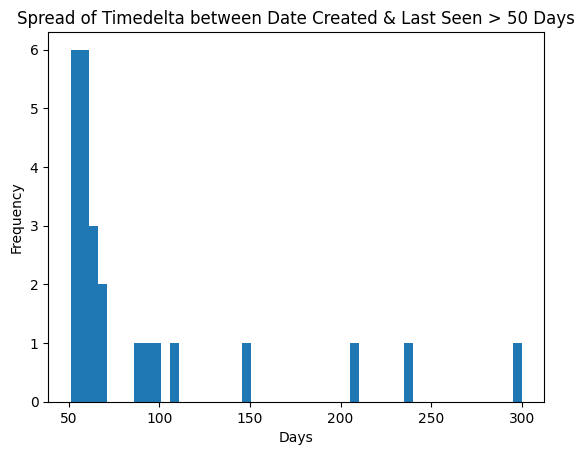

In [37]:
df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50').listing_duration.plot(
    kind='hist', bins=50, title='Spread of Timedelta between Date Created & Last Seen > 50 Days'
)
plt.xlabel('Days')
plt.show()

What's the average cost of cars & average mileage of cars with long listing periods?

In [38]:
avg_price_long_listing = df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50').price_usd.mean()

avg_price_not_long = df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration <= 50').price_usd.mean()

avg_price = df.price_usd.mean()

print(f'The average car price for listings longer than 50 days is {avg_price_long_listing:,.2f}')
print(f'The average car price for listings under 50 days is {avg_price_not_long:,.2f}')
print(f'The average car price in the dataset is {avg_price:,.2f}')

The average car price for listings longer than 50 days is 9,107.80
The average car price for listings under 50 days is 9,840.41
The average car price in the dataset is 9,840.04


In [39]:
avg_mileage_long_listing = df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50').odometer_km.mean()

avg_mileage_not_long = df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration <= 50').odometer_km.mean()

avg_mileage = df.odometer_km.mean()

print(f'The average mileage for listings longer than 50 days is {avg_mileage_long_listing:,.2f}')
print(f'The average mileage for listings under 50 days is {avg_mileage_not_long:,.2f}')
print(f'The average mileage in the dataset is {avg_mileage:,.2f}')

The average mileage for listings longer than 50 days is 112,000.00
The average mileage for listings under 50 days is 125,739.57
The average mileage in the dataset is 125,732.70


Neither mileage nor price seems to be a cause for listings staying longer on the site. 

This hypothesis is confirmed when we test for correlation:

In [40]:
data = df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
)[['price_usd', 'odometer_km', 'listing_duration', 'registration_year']]

data.corr()

,price_usd,odometer_km,listing_duration,registration_year
price_usd,1.000000,-0.007305,0.002998,0.000945
odometer_km,-0.007305,1.000000,-0.086256,-0.223117
listing_duration,0.002998,-0.086256,1.000000,0.032049
registration_year,0.000945,-0.223117,0.032049,1.000000


Listing duration by brand:

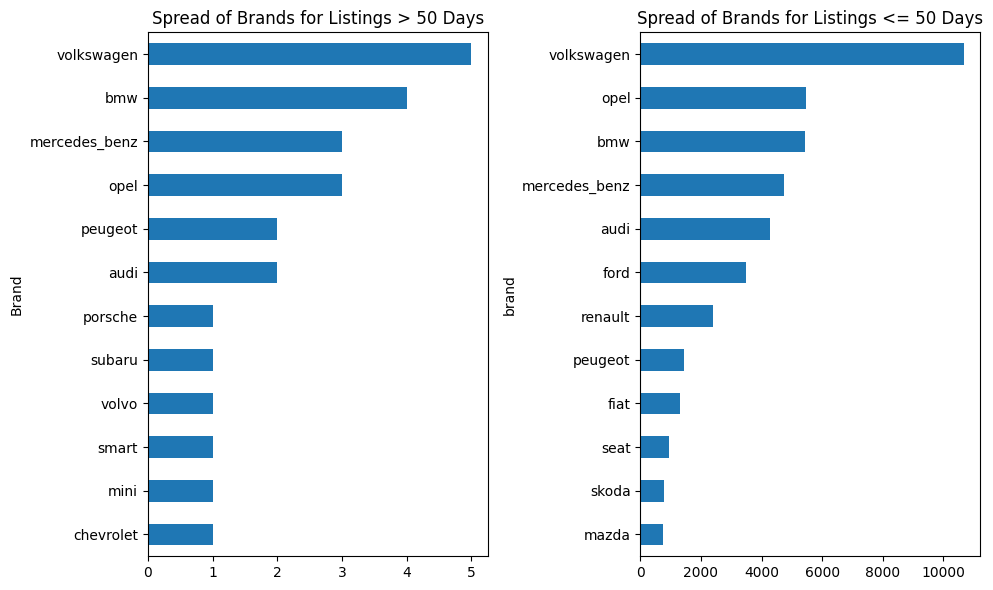

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50').brand.value_counts().plot(
    kind='barh', ylabel='Brand', title='Spread of Brands for Listings > 50 Days', ax=axes[0]
)
axes[0].invert_yaxis()

df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration <= 50').brand.value_counts(ascending=False)[:12].plot(
    kind='barh', title='Spread of Brands for Listings <= 50 Days', ax=axes[1]
)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

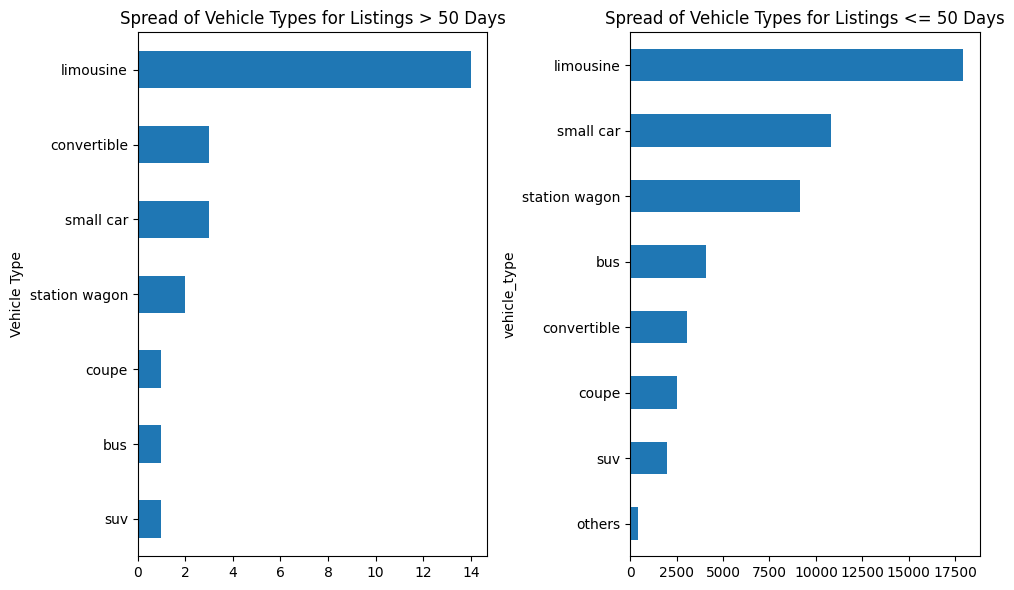

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration > 50').vehicle_type.value_counts().plot(
    kind='barh', ylabel='Vehicle Type', title='Spread of Vehicle Types for Listings > 50 Days', ax=axes[0]
)
axes[0].invert_yaxis()

df.assign(
    listing_duration=lambda x: pd.to_datetime(x.last_seen.dt.date) - x.date_created
).assign(
    listing_duration=lambda x: x.listing_duration.dt.total_seconds() / (60 * 60 * 24)
).query('listing_duration <= 50').vehicle_type.value_counts(ascending=False).plot(
    kind='barh', title='Spread of Vehicle Types for Listings <= 50 Days', ax=axes[1]
)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Exploring Price by Brand**

In [43]:
df.brand.unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'other cars', 'opel',
       'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan', 'jeep',
       'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda', 'subaru',
       'kia', 'citroen', 'chevrolet', 'hyundai', 'honda', 'daewoo',
       'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada', 'rover',
       'daihatsu', 'lancia'], dtype=object)

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_15042/2566078262.py:1: FutureWarning: The provided callable <function mean at 0x107e3f250> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_order = df.groupby(by='brand').agg({'price_usd':np.mean}).sort_values(by='price_usd', ascending=False).index.values


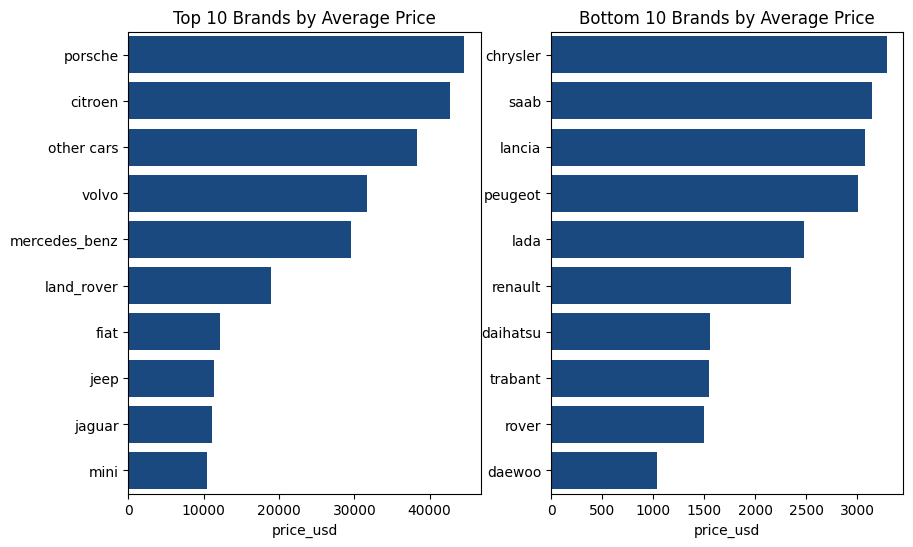

In [49]:
plot_order = df.groupby(by='brand').agg({'price_usd':np.mean}).sort_values(by='price_usd', ascending=False).index.values
num_bars = len(plot_order[:10])
custom_palette = sns.color_palette("Blues_r", n_colors=num_bars)
sns.set_palette(custom_palette)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=df, y='brand',  x='price_usd',orient='h', errorbar=None, order=plot_order[:10], ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Top 10 Brands by Average Price')

sns.barplot(data=df, y='brand',  x='price_usd',orient='h', errorbar=None, order=plot_order[-10:], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Bottom 10 Brands by Average Price')

plt.show()

**Average mileage for Top 10 Brands**

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_15042/1495133935.py:1: FutureWarning: The provided callable <function mean at 0x107e3f250> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_order = df.groupby(by='brand').agg({'odometer_km':np.mean}).sort_values(by='odometer_km', ascending=False).index.values


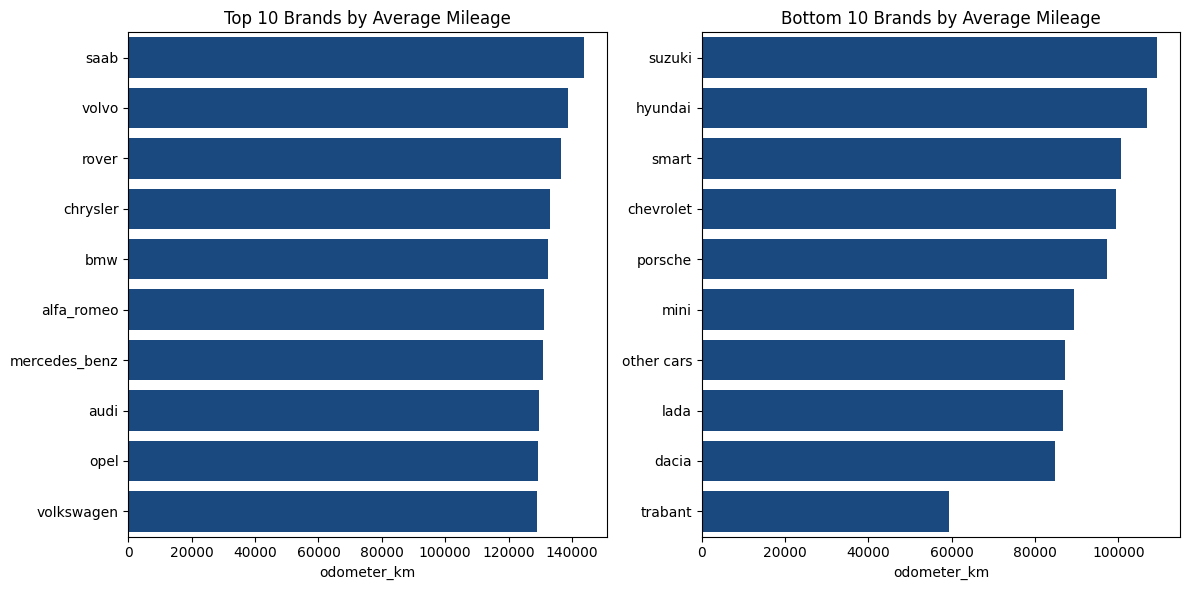

In [52]:
plot_order = df.groupby(by='brand').agg({'odometer_km':np.mean}).sort_values(by='odometer_km', ascending=False).index.values
num_bars = len(plot_order[:10])
custom_palette = sns.color_palette("Blues_r", n_colors=num_bars)
sns.set_palette(custom_palette)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=df, y='brand',  x='odometer_km',orient='h', errorbar=None, order=plot_order[:10], ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Top 10 Brands by Average Mileage')

sns.barplot(data=df, y='brand',  x='odometer_km',orient='h', errorbar=None, order=plot_order[-10:], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Bottom 10 Brands by Average Mileage')

plt.tight_layout()
plt.show()

**Review `name` column**

See if there are particular keywords in the `name` column that can be extracted as new columns

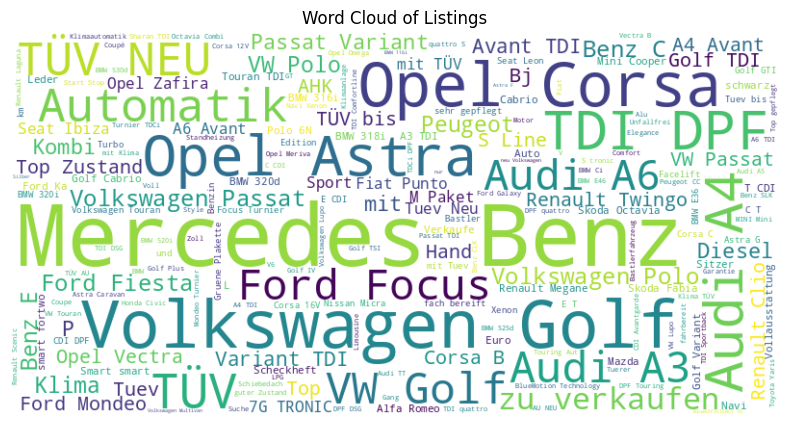

In [55]:
text = ' '.join(df['name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Listings")
plt.show()

Mostly, the listings column lists the car brand and we see that the most popular listed car is the Mercedes Benz.

**Most common brand/model combinations**

In [57]:
combinations = df.groupby(['brand', 'model']).size().reset_index(name='Count')
most_common = combinations.sort_values(by='Count', ascending=False)

most_common.head(10)

,brand,model,Count
267,volkswagen,golf,4024
23,bmw,3er,2761
274,volkswagen,polo,1757
182,opel,corsa,1735
179,opel,astra,1454
272,volkswagen,passat,1425
13,audi,a4,1291
24,bmw,5er,1183
141,mercedes_benz,c_klasse,1172
144,mercedes_benz,e_klasse,1001


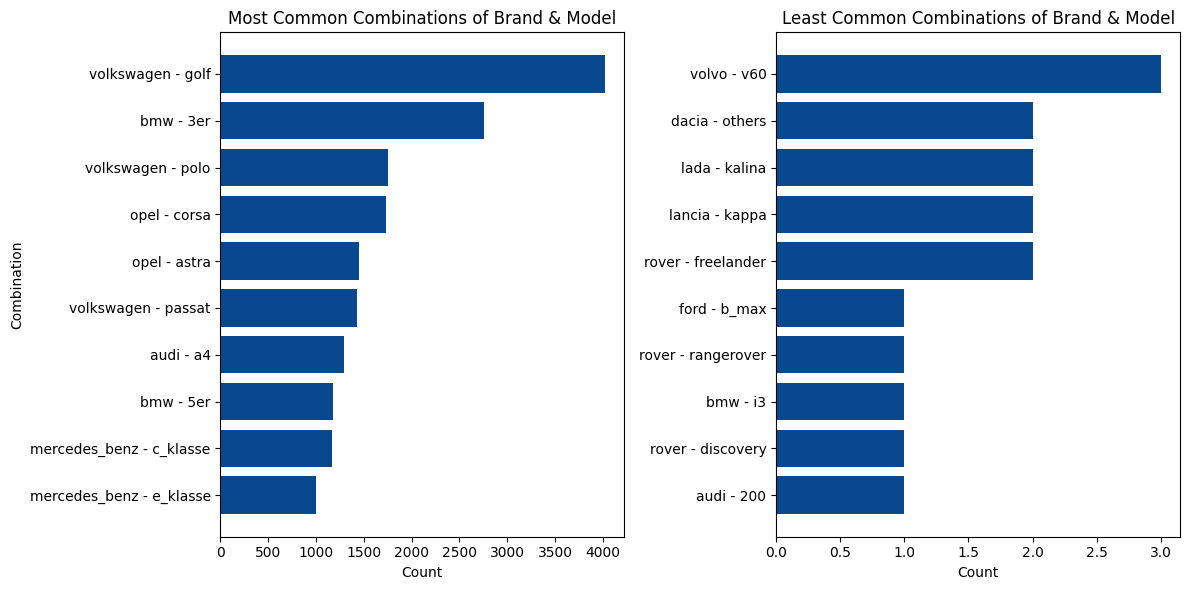

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_10_combo = most_common.head(10)
axes[0].barh(top_10_combo['brand'] + " - " + top_10_combo['model'], top_10_combo['Count'])
axes[0].set_ylabel('Combination')
axes[0].set_xlabel('Count')
axes[0].set_title('Most Common Combinations of Brand & Model')
axes[0].invert_yaxis()

bot_10_combo = most_common.tail(10)
axes[1].barh(bot_10_combo['brand'] + " - " + bot_10_combo['model'], bot_10_combo['Count'])
# axes[1].set_ylabel('Combination')
axes[1].set_xlabel('Count')
axes[1].set_title('Least Common Combinations of Brand & Model')
axes[1].invert_yaxis()

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The volkswagen golf is the most popular listed car. On average the car is listed for $4861.99.

In [74]:
df.groupby(['brand', 'model']).agg(
    {'price_usd':'mean', 'odometer_km':'count'}
    ).reset_index().rename(
        columns={'price_usd': 'avg_price', 'odometer_km':'count'}
        ).sort_values(
        by='count', ascending=False
        ).avg_price.iloc[0]

4861.994532803181

Top 10 Brand Model Combo Avg Price:

In [75]:
df.groupby(['brand', 'model']).agg(
    {'price_usd':'mean', 'odometer_km':'count'}
    ).reset_index().rename(
        columns={'price_usd': 'avg_price', 'odometer_km':'count'}
        ).sort_values(
        by='count', ascending=False
        ).head(10)

,brand,model,avg_price,count
267,volkswagen,golf,4861.994533,4024
23,bmw,3er,5775.338645,2761
274,volkswagen,polo,2453.744451,1757
182,opel,corsa,1812.296254,1735
179,opel,astra,3170.627923,1454
272,volkswagen,passat,4773.889123,1425
13,audi,a4,6803.665376,1291
24,bmw,5er,7723.759932,1183
141,mercedes_benz,c_klasse,6894.471843,1172
144,mercedes_benz,e_klasse,7849.229770,1001


Bottom 10 Brand Model Combo Avg Price:

In [76]:
df.groupby(['brand', 'model']).agg(
    {'price_usd':'mean', 'odometer_km':'count'}
    ).reset_index().rename(
        columns={'price_usd': 'avg_price', 'odometer_km':'count'}
        ).sort_values(
        by='count', ascending=False
        ).tail(10)

,brand,model,avg_price,count
288,volvo,v60,21000.0,3
53,dacia,others,4350.0,2
115,lada,kalina,2100.0,2
120,lancia,kappa,1725.0,2
214,rover,freelander,2375.0,2
77,ford,b_max,10600.0,1
216,rover,rangerover,23500.0,1
27,bmw,i3,250.0,1
213,rover,discovery,2800.0,1
7,audi,200,2250.0,1


**Find Patterns in Odometer Columns**

Split the `odometer_km` into groups, and use aggregation to see if average prices follow any patterns based on the mileage.

In [ ]:
pd.qcut(df.odometer_km, q=4)

In [87]:
bin_ranges = [0, 25000, 50000, 75000, 100000, 125000, 150000]
bin_labels = ['0', '<25k', '50k - 75k', '75k - 100k', '100k - 125k', '>125k']
df.assign(
    odometer_quarters=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
).odometer_quarters.unique()

['>125k', '50k - 75k', '<25k', '75k - 100k', '0', '100k - 125k']
Categories (6, object): ['0' < '<25k' < '50k - 75k' < '75k - 100k' < '100k - 125k' < '>125k']

In [94]:
def format_mean(x):
    return f"{x.mean():,.2f}"

bin_ranges = [0, 25000, 50000, 75000, 100000, 125000, 150000]
bin_labels = ['<25k', '25k - 50k', '50k - 75k', '75k - 100k', '100k - 125k', '>125k']
df.assign(
    odometer_groups=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
).groupby(
    by='odometer_groups'
).price_usd.agg(format_mean)

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_15042/3463912180.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.assign(


odometer_groups
<25k           14,839.42
25k - 50k      30,027.25
50k - 75k      11,431.65
75k - 100k     10,270.96
100k - 125k     6,197.90
>125k           8,280.77
Name: price_usd, dtype: object

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_15042/1382419176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.assign(


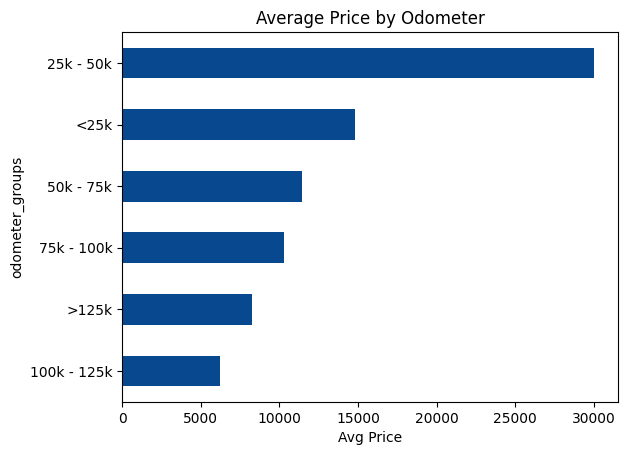

In [101]:
df.assign(
    odometer_groups=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
).groupby(
    by='odometer_groups'
).price_usd.mean().sort_values().plot.barh(
    title='Average Price by Odometer', xlabel='Avg Price'
    )
# plt.gca().invert_yaxis()
plt.show()

There is a pattern in price when segmented by odometer groups. The higher the odometer, the lower the price. Let's test this using correlation, boxplots & regression:

In [102]:
df[['price_usd', 'odometer_km']].corr()

,price_usd,odometer_km
price_usd,1.000000,-0.007305
odometer_km,-0.007305,1.000000


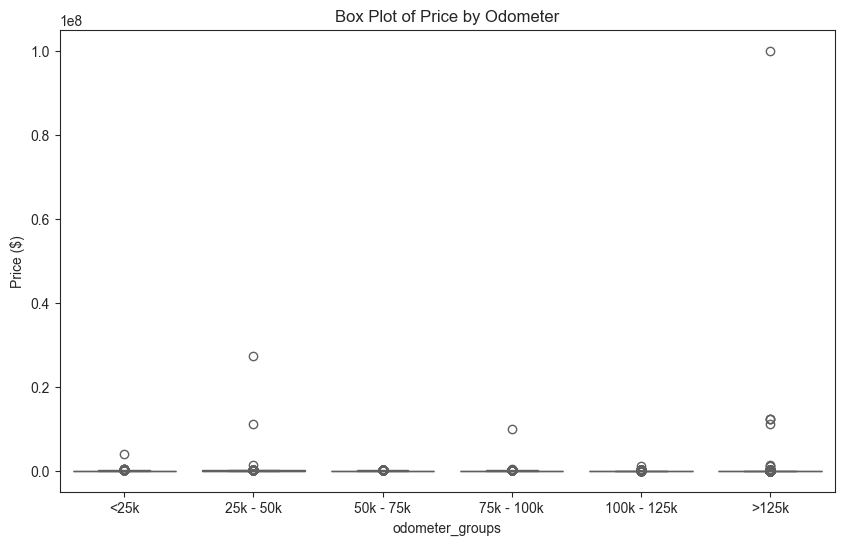

In [106]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")

data = df.assign(
    odometer_groups=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
)
sns.boxplot(
    x='odometer_groups', y='price_usd', data=data, color=deep_colors[4]
)
plt.xlabel=('Odometer Groups')
plt.ylabel('Price ($)')
plt.title('Box Plot of Price by Odometer')

plt.show()

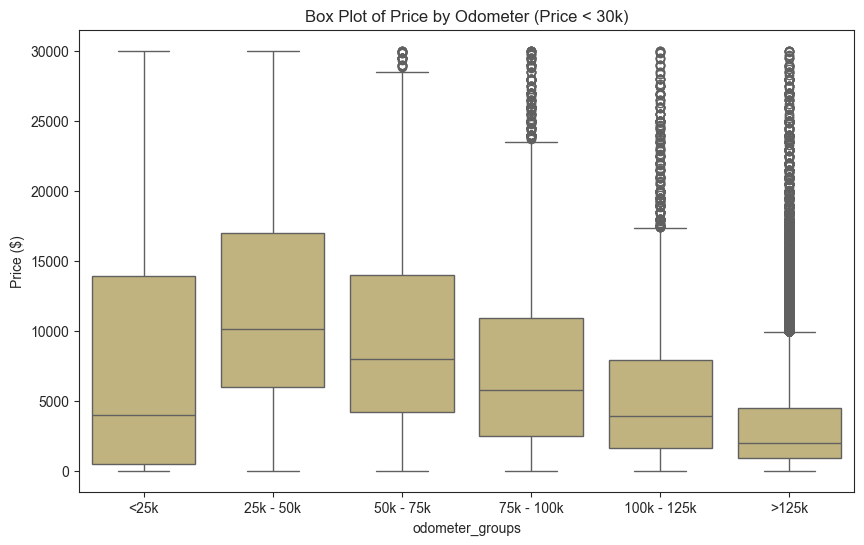

In [132]:
plt.figure(figsize=(10, 6))
sns.set_style("ticks")

data = df.assign(
    odometer_groups=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
)
sns.boxplot(
    x='odometer_groups', y='price_usd', data=data.query('price_usd < 30000'), color=deep_colors[4]
)
plt.xlabel=('Odometer Groups')
plt.ylabel('Price ($)')
plt.title('Box Plot of Price by Odometer (Price < 30k)')

plt.show()

In [112]:
data = df.assign(
    odometer_groups=lambda x: pd.cut(x.odometer_km, bins=bin_ranges, labels=bin_labels)
)
formula = 'price_usd ~ odometer_groups + odometer_km'
model = smf.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9443
Date:                Sat, 28 Oct 2023   Prob (F-statistic):              0.462
Time:                        09:16:39   Log-Likelihood:            -7.2514e+05
No. Observations:               50000   AIC:                         1.450e+06
Df Residuals:                   49993   BIC:                         1.450e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

The statistical analyses shows that the hypothesis from our bar chart is to be rejected in favour of the null hypothesis that there is no relationship between price and odometer.

**Determine Relationship between Price and Numeric Columns**
* Unrepaired Damage
* Vehicle Type
* Fuel Type
* Gear Box

How much cheaper are cars with damage than their non-damaged counterparts?

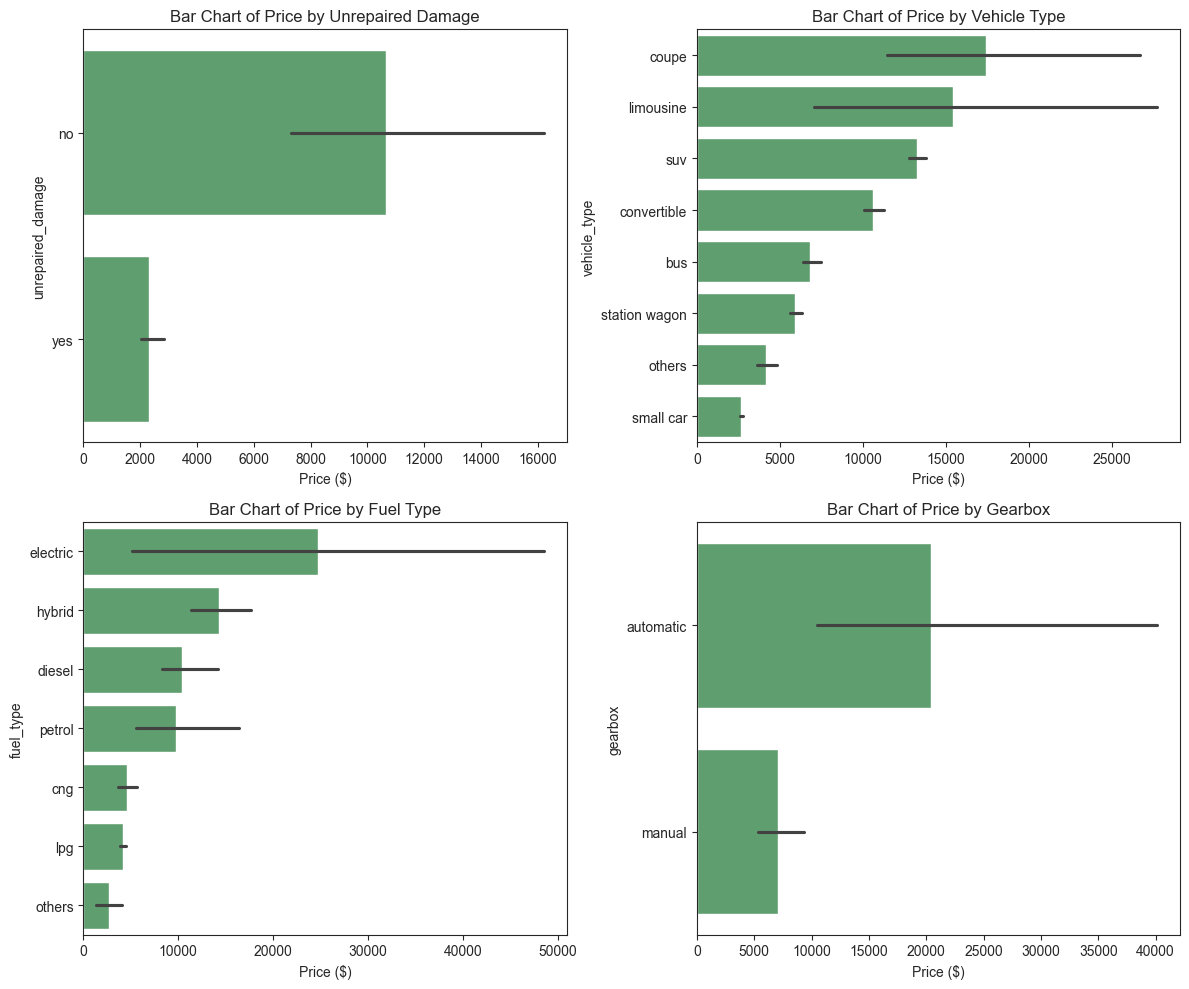

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cols_plot = ['unrepaired_damage', 'vehicle_type', 'fuel_type', 'gearbox']
for col, ax in zip(cols_plot, axes.ravel()):
    count_data = df.groupby(col).agg(
    {'price_usd':'mean'}
    ).sort_values(by='price_usd', ascending=False).reset_index()
    num_bars = len(count_data)

    sns.barplot(
        x='price_usd', y=col, data=df, 
        color=deep_colors[1], ax=ax,
        orient='h',
        order=count_data[col],
    )
    ax.set_xlabel('Price ($)')
    ax.set_ylabel(col)
    ax.set_title(f'Bar Chart of Price by {col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

Let's test this using Regression:

In [122]:
formula = 'price_usd ~ unrepaired_damage + vehicle_type + fuel_type + gearbox'
model = smf.ols(formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8445
Date:                Sat, 28 Oct 2023   Prob (F-statistic):              0.628
Time:                        09:33:48   Log-Likelihood:            -7.2513e+05
No. Observations:               50000   AIC:                         1.450e+06
Df Residuals:                   49984   BIC:                         1.450e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [123]:
formula = 'price_usd ~ gearbox'
model = smf.ols(formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.322
Date:                Sat, 28 Oct 2023   Prob (F-statistic):             0.0119
Time:                        09:33:52   Log-Likelihood:            -7.2514e+05
No. Observations:               50000   AIC:                         1.450e+06
Df Residuals:                   49998   BIC:                         1.450e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.044e+04   4734.00

Conclusion: The chart is not statistically significant.

**Most Common Brand & Gearbox Combinations**

In [124]:
combinations = df.groupby(['brand', 'gearbox']).size().reset_index(name='Count')
most_common = combinations.sort_values(by='Count', ascending=False)

most_common.head(10)

,brand,gearbox,Count
76,volkswagen,manual,9320
48,opel,manual,4909
5,bmw,manual,3636
20,ford,manual,3208
3,audi,manual,2893
39,mercedes_benz,automatic,2584
56,renault,manual,2251
40,mercedes_benz,manual,2150
4,bmw,automatic,1793
2,audi,automatic,1390


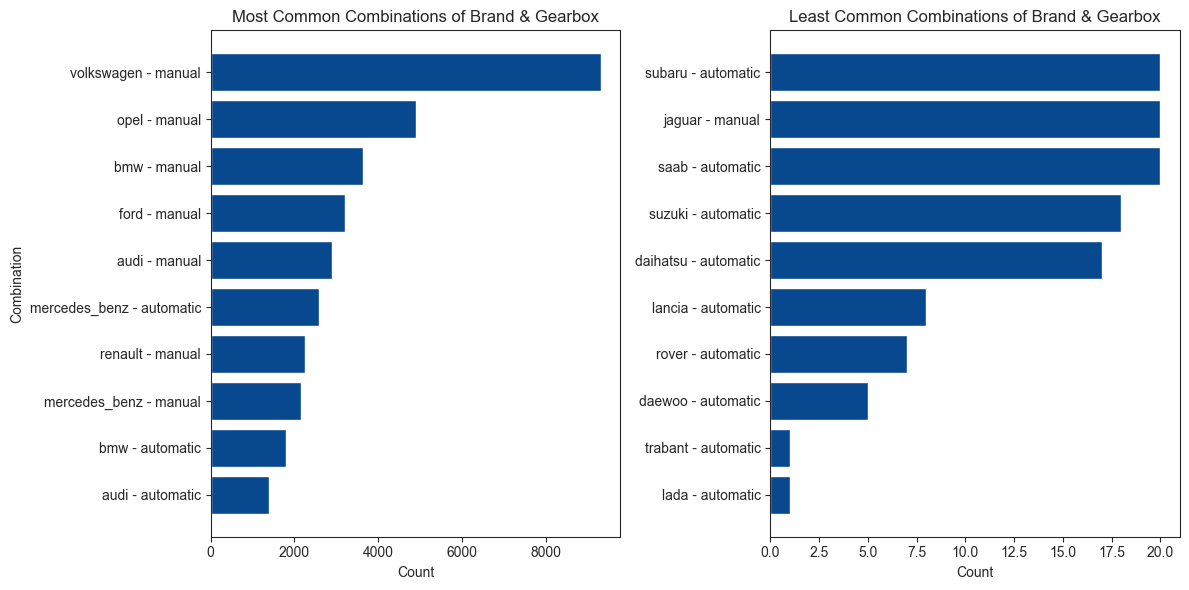

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_10_combo = most_common.head(10)
axes[0].barh(top_10_combo['brand'] + " - " + top_10_combo['gearbox'], top_10_combo['Count'])
axes[0].set_ylabel('Combination')
axes[0].set_xlabel('Count')
axes[0].set_title('Most Common Combinations of Brand & Gearbox')
axes[0].invert_yaxis()

bot_10_combo = most_common.tail(10)
axes[1].barh(bot_10_combo['brand'] + " - " + bot_10_combo['gearbox'], bot_10_combo['Count'])
# axes[1].set_ylabel('Combination')
axes[1].set_xlabel('Count')
axes[1].set_title('Least Common Combinations of Brand & Gearbox')
axes[1].invert_yaxis()

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [131]:
df.loc[df.price_usd < 30000].shape[0] / df.shape[0]

0.98392

**Price as a Function of Registration Year & Month**

In [135]:
formula = 'price_usd ~ registration_year + registration_month + power_ps'
model = smf.ols(formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6096
Date:                Sat, 28 Oct 2023   Prob (F-statistic):              0.609
Time:                        09:44:40   Log-Likelihood:            -7.2514e+05
No. Observations:               50000   AIC:                         1.450e+06
Df Residuals:                   49996   BIC:                         1.450e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -6.31e+04   5.74

### Conclusion

For the distribution of numeric features:
* Price is very right skewed with 98.4% of values under 30k
* Registration year is left skewed, with most cars being registered after 1990.
* Horse power is severely right skewed as well.
* Odometer only has a few unique values, making a better categorical column than numeric. It is also left skewed, with most listings having odomoter values inexcess of 120km.

For distribution of Categorical features:
* More limousines are listed on the site
* Manual fearboxes are omre popular
* Petrol engines are more popular
* Cars with no unrepaired damaged are more popular.

In plotting price over time, there's no specific trend and there's no seaonality trend in price.

Nearly all listings are in the month of March.

Most listings stay onsite for less than 50 days. In determining why listings stay on site for longer, neither price, brand, vehicle type nor mileage is a good predictor.

The most expensive listed vehicle brand is the Porsche and the least expensive is the Daewoo.

The top 10 brands by avereage mileage is made up of luxury and non-luxury vehicle brand names.

Mercedex Benz is the most popular listing name.

The volkswagen golf is the most popular brand/model combination with nearly 4k listings. On average the car is listed for $4861.99.

When grouped by odometer, we gind that the higher the odometer value, the lower the average price. However, this hypothesis fails statistical testing.

None of the remaining variables are able to explain the variation in the price column, implying that there is no statistically significant relationship between price and other features. 
